# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [197]:
# Used car price is influenced by some key characteristics of the car

In [198]:
# Identify the characteristics which makes the car more or less expensive

In [199]:
# It is safe to assume these characters are also liked by the customers

In [200]:
# Needs to ptovide summary for the used car what their customers are looking into before buying a car

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [201]:
# First load the data as adataframe; Review the data columns; Review first few rows of data

In [202]:
# Get some mathematical insight into the dataset (mean, avg price, age of the car etc...)

In [203]:
# Identify the numberical columns vs non-numerical columns and based upon domain knowledge determine
# how to processes each column (like using ordianl/nominal data for some columns)

In [204]:
# Pick few lowest price records and few highest price records...Review the attributes associated with these records..
# This will give an idea about the potential relationship between the characterisitcs of the car and the price

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [205]:
# Identify unique values for some text columns (to determine ordinal vs nominal approach)

In [206]:
# Drop any NA rows; Drop Duplicate rows

In [207]:
# see any outliers in the dataset like very high price and drop the same

In [208]:
# Draw a histogram to understand the distribution

In [209]:
import numpy as np
import pandas as pd
from statsmodels.tsa import arima_process
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from datetime import datetime
import seaborn as sns

from statsmodels.datasets import nile
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
warnings.filterwarnings("ignore")

In [210]:
cp = pd.read_csv('data/vehicles.csv')
cp.head()
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [211]:
cp.head()
cp['year'] = cp['year'].fillna(0).astype(int)
cp = cp.dropna()


In [212]:
cp.duplicated().sum()

0

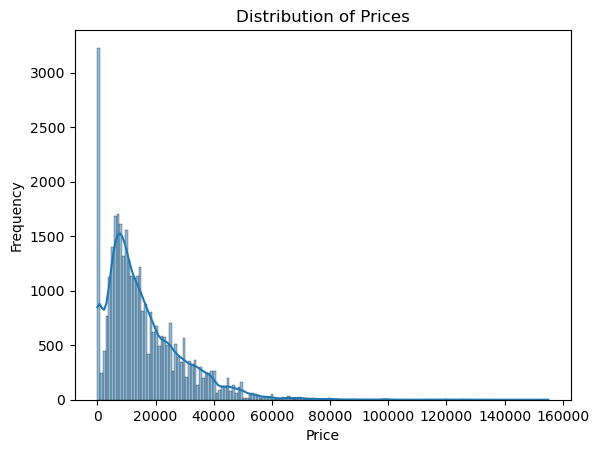

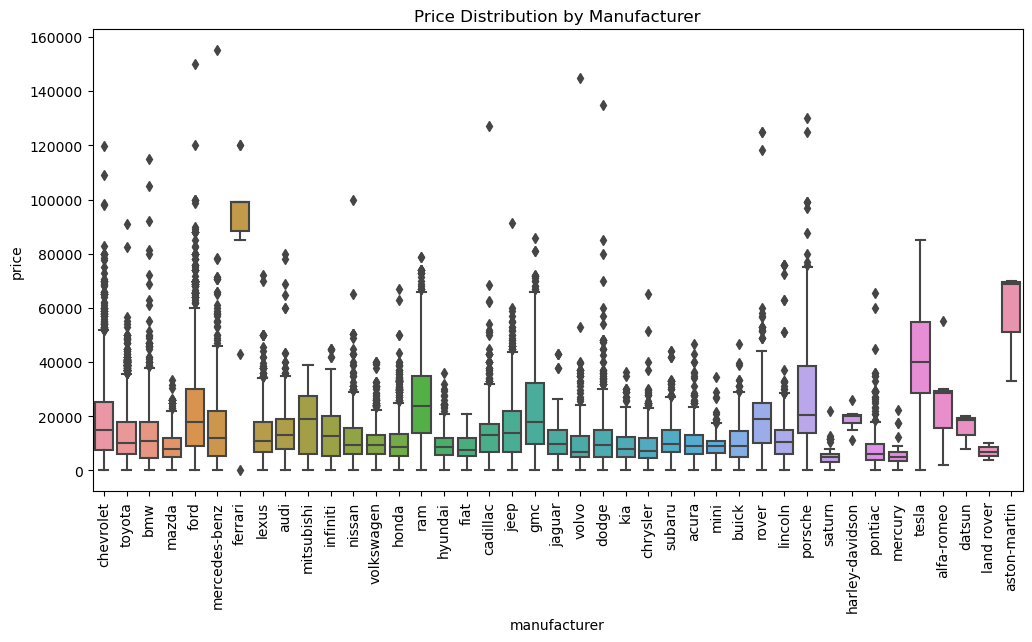

In [213]:
# Histogram of prices
sns.histplot(cp['price'], kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot for price by manufacturer to get an idea of spread and outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='price', data=cp)
plt.xticks(rotation=90)  # Rotate labels to prevent overlap
plt.title('Price Distribution by Manufacturer')
plt.show()

In [214]:
# Current year
current_year = datetime.now().year

# Calculate age of the car
cp['car_age'] = current_year - cp['year']

# Dropping region column as it has a limited influence on the price
#cp = cp.drop('region', axis=1)  # axis=1 specifies that we are dropping a column

In [215]:
cp.describe()

,id,price,year,odometer,car_age
count,3.486800e+04,34868.000000,34868.000000,3.486800e+04,34868.000000
mean,7.311508e+09,15837.446771,2011.176867,1.073991e+05,12.823133
std,4.299751e+06,13460.056823,7.162332,9.990878e+04,7.162332
min,7.301592e+09,0.000000,1905.000000,0.000000e+00,2.000000
25%,7.308189e+09,6500.000000,2008.000000,6.516400e+04,8.000000
50%,7.312225e+09,12000.000000,2013.000000,1.040000e+05,11.000000
75%,7.315136e+09,22003.500000,2016.000000,1.411678e+05,16.000000
max,7.317099e+09,155000.000000,2022.000000,9.999999e+06,119.000000


In [216]:
# Dropping region column as it has a limited influence on the price
# cp = cp.drop('region', axis=1)  # axis=1 specifies that we are dropping a column
non_numerical_columns = cp.select_dtypes(exclude=['int', 'float', 'int64', 'float64']).columns

# Display the DataFrame after
# Print unique values for each non-numerical column
for column in non_numerical_columns:
    print(f"Unique values in the column '{column}': {cp[column].unique()}")

Unique values in the column 'region': ['auburn' 'birmingham' 'dothan' 'florence / muscle shoals'
 'gadsden-anniston' 'huntsville / decatur' 'mobile' 'montgomery'
 'tuscaloosa' 'anchorage / mat-su' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'prescott' 'show low'
 'tucson' 'yuma' 'fayetteville' 'fort smith' 'jonesboro' 'little rock'
 'texarkana' 'bakersfield' 'chico' 'fresno / madera' 'gold country'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville' 'ventura county'
 'visalia-tulare' 'yuba-sutter' 'boulder' 'colorado springs' 'denver'
 'eastern CO' 'fort collins / north CO' 'high rockies' 'pueblo'
 'western slope' 'eastern CT' 'hartford' 'new haven' 'northwest CT'
 'washington, DC' 'delaware' 

In [217]:
cp = cp.dropna()

In [218]:
categorical_columns = cp.select_dtypes(include=['object']).columns

# Calculate average price per manufacturer and sort
avg_price_sorted = cp.groupby('manufacturer')['price'].mean().sort_values()

# Map sorted manufacturers to ordinal values
manufacturer_map = {manufacturer: i for i, manufacturer in enumerate(avg_price_sorted.index)}
cp['manufacturer_ordinal'] = cp['manufacturer'].map(manufacturer_map)
print(manufacturer_map)

{'saturn': 0, 'mercury': 1, 'land rover': 2, 'fiat': 3, 'chrysler': 4, 'kia': 5, 'hyundai': 6, 'pontiac': 7, 'mazda': 8, 'mini': 9, 'honda': 10, 'volkswagen': 11, 'buick': 12, 'acura': 13, 'nissan': 14, 'subaru': 15, 'volvo': 16, 'dodge': 17, 'jaguar': 18, 'bmw': 19, 'lincoln': 20, 'toyota': 21, 'lexus': 22, 'infiniti': 23, 'cadillac': 24, 'audi': 25, 'mercedes-benz': 26, 'jeep': 27, 'datsun': 28, 'chevrolet': 29, 'mitsubishi': 30, 'harley-davidson': 31, 'ford': 32, 'gmc': 33, 'rover': 34, 'alfa-romeo': 35, 'ram': 36, 'porsche': 37, 'tesla': 38, 'aston-martin': 39, 'ferrari': 40}


In [219]:
# One-hot encoding for categorical variables with reasonable number of categories
cp = pd.get_dummies(cp, columns=['condition', 'fuel', 'transmission', 'title_status'])

# Optional: Label encoding or custom ordinal encoding for 'cylinders' if deemed necessary
from sklearn.preprocessing import LabelEncoder
le_cylinders = LabelEncoder()
cp['cylinders_encoded'] = le_cylinders.fit_transform(cp['cylinders'])

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [220]:
# Model - 1 - Very simple

# To make the problem simple...used manufacturer characteristics for analysis

# Selecting features and target
X = cp[['manufacturer_ordinal', 'car_age', 'odometer']]  # example features
y = cp['price']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model
model1 = LinearRegression()
model1.fit(X_train, y_train)



LinearRegression()

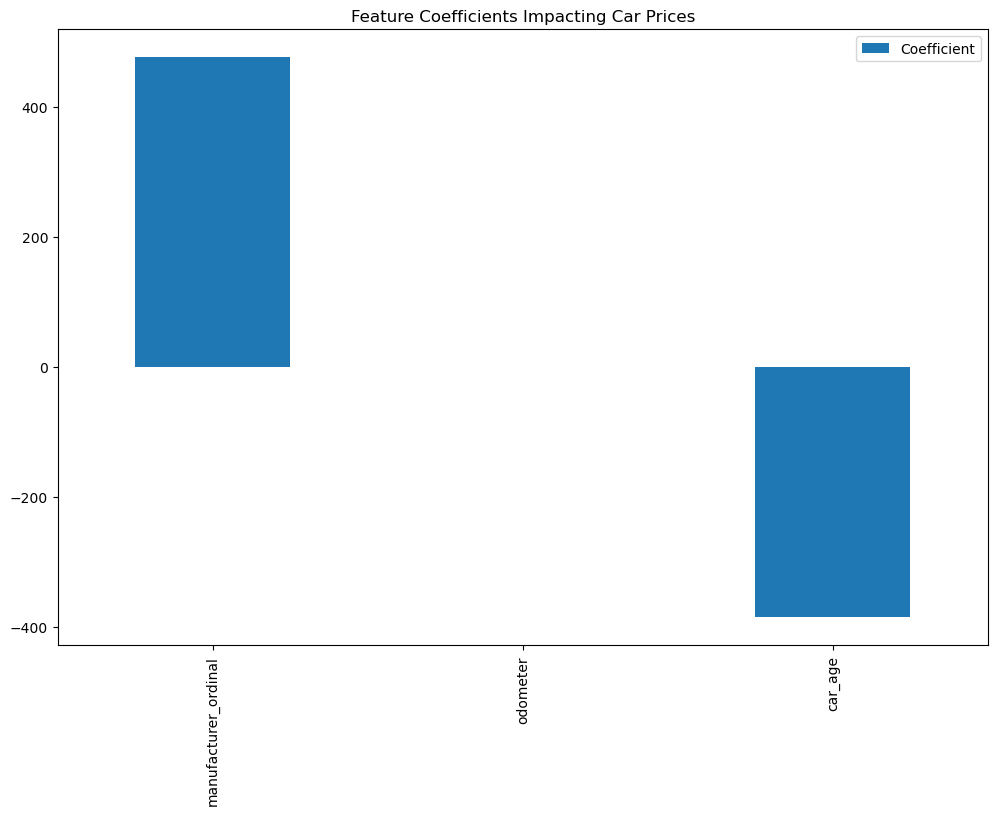

In [221]:
# Display the coefficients as a bar chart
coefficients = pd.DataFrame(model1.coef_, X.columns, columns=['Coefficient'])
coefficients.sort_values('Coefficient', ascending=False).plot(kind='bar', figsize=(12, 8))
plt.title('Feature Coefficients Impacting Car Prices')
plt.show()

In [222]:
# Model 2 - with few more characteristics
features = ['manufacturer_ordinal', 'car_age', 'odometer'] + [col for col in cp.columns if 'condition_' in col or 'fuel_' in col or 'transmission_' in col or 'title_status_' in col]
X2 = cp[features]
y2 = cp['price']

# Train-test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Linear regression model
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)



In [223]:
# Dictionary to hold groups of dummy variables
dummy_groups = {}

# List of original categorical columns that were one-hot encoded
categories = ['condition', 'fuel', 'transmission', 'title_status']

# Grouping dummy columns by their original categorical names
for category in categories:
    dummy_groups[category] = [col for col in cp.columns if col.startswith(category + '_')]

# Example of accessing the dummy columns for 'condition'
condition_dummies = cp[dummy_groups['condition']]
print("Condition Dummies:\n", condition_dummies.head())

Condition Dummies:
      condition_excellent  condition_fair  condition_good  condition_like new  \
126                False           False           False                True   
127                False           False           False                True   
128                False           False           False                True   
215                 True           False           False               False   
219                False            True           False               False   

     condition_new  condition_salvage  
126          False              False  
127          False              False  
128          False              False  
215          False              False  
219          False              False  


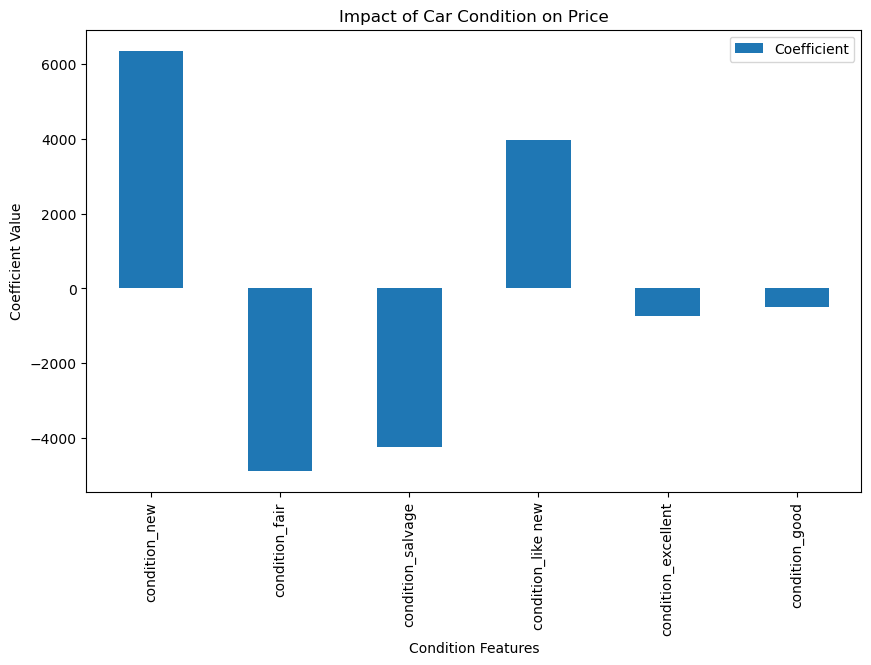

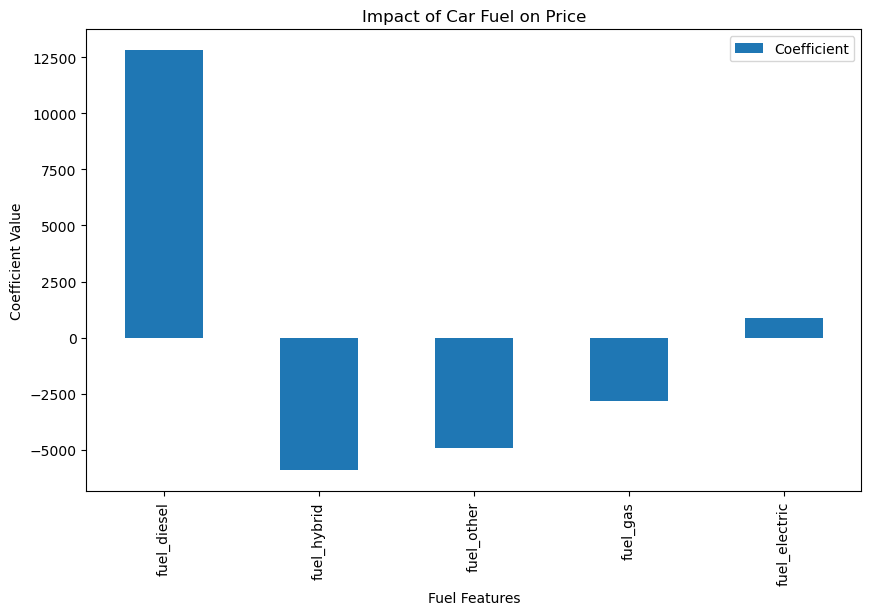

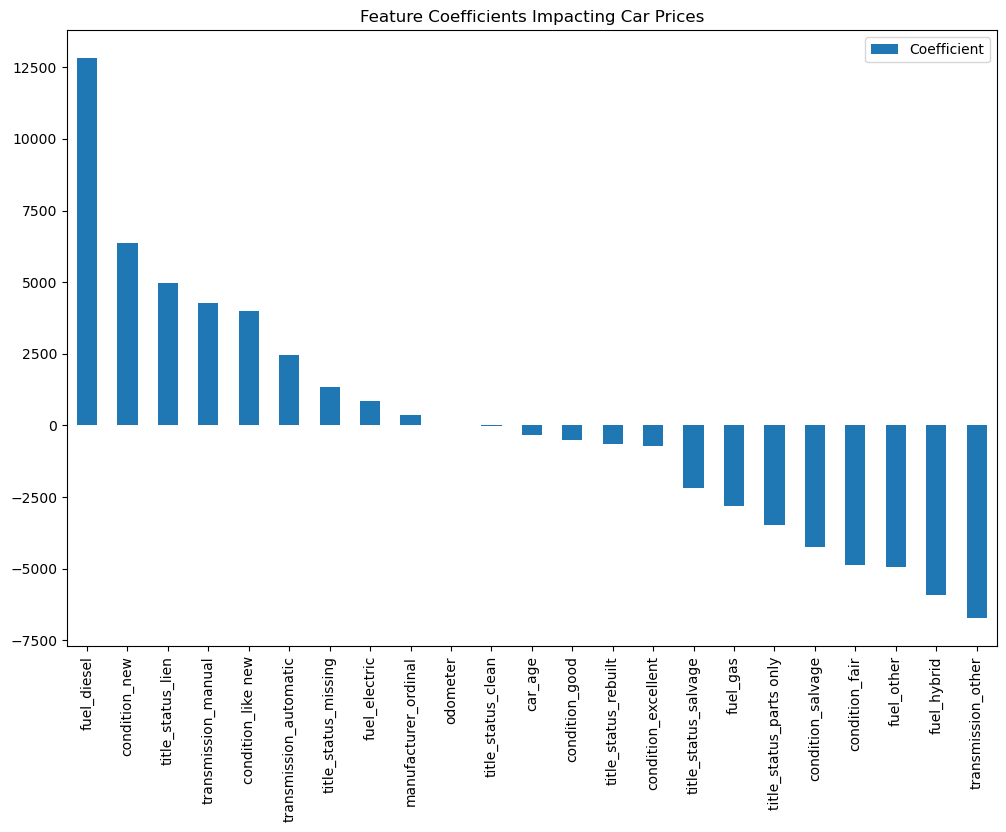

In [229]:
coefficients = pd.DataFrame(model2.coef_, X2.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', key=np.abs, ascending=False)

# Plotting only coefficients related to 'condition'
condition_coefficients = coefficients[coefficients.index.isin(dummy_groups['condition'])]
condition_coefficients.plot(kind='bar', figsize=(10, 6))
plt.title('Impact of Car Condition on Price')
plt.ylabel('Coefficient Value')
plt.xlabel('Condition Features')
plt.show()

# Plotting only coefficients related to 'condition'
condition_coefficients = coefficients[coefficients.index.isin(dummy_groups['fuel'])]
condition_coefficients.plot(kind='bar', figsize=(10, 6))
plt.title('Impact of Car Fuel on Price')
plt.ylabel('Coefficient Value')
plt.xlabel('Fuel Features')
plt.show()

# Display the coefficients as a bar chart
coefficients = pd.DataFrame(model2.coef_, X2.columns, columns=['Coefficient'])
coefficients.sort_values('Coefficient', ascending=False).plot(kind='bar', figsize=(12, 8))
plt.title('Feature Coefficients Impacting Car Prices')
plt.show()

# Similar analysis can be done for transmission and title status

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [225]:
# Predicting on the test set
y_pred = model1.predict(X_test)

# Calculating metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print out the metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

# If you have multiple predictors and are interested in Adjusted R-squared
n = len(X_test)  # Number of observations
p = X_test.shape[1]  # Number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adj_r2)

Mean Squared Error (MSE): 158839085.37465385
Root Mean Squared Error (RMSE): 12603.137917782771
Mean Absolute Error (MAE): 8496.717374204978
R-squared (R²): 0.15907254135597515
Adjusted R-squared: 0.15871059266502363


In [227]:
# Predicting on the test set
y2_pred = model2.predict(X2_test)

# Calculating metrics
mse = mean_squared_error(y2_test, y2_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y2_test, y2_pred)
r2 = r2_score(y2_test, y2_pred)

# Print out the metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

# If you have multiple predictors and are interested in Adjusted R-squared
n = len(X2_test)  # Number of observations
p = X2_test.shape[1]  # Number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adj_r2)

Mean Squared Error (MSE): 139326249.7890876
Root Mean Squared Error (RMSE): 11803.65408630258
Mean Absolute Error (MAE): 7780.213873102241
R-squared (R²): 0.2623775887327294
Adjusted R-squared: 0.2599365361486795


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [ ]:
# Explain the processes to the dealer

In [ ]:
# Explain both the model details

In [ ]:
# Explain which model is better based upon the MSE

In [ ]:
# For the best model explain the co-efficients associated with each characters